# Building a data science portfolio: Storytelling with data
https://www.dataquest.io/blog/data-science-portfolio-project/

Walking through example from their blog...

**QUESTION**: *What is the fairness of the SAT testing in NYC schools?*

DATA - downloaded and cleaned up names.  in "./data/nyc_schools" folder

DataQuest have a solution at https://github.com/dataquestio/solutions/blob/master/Mission217Solutions.ipynb
- **See Solutions project** cloned into /Users/Rob/Projects/Notebooks/DataQuestIO/solutions


In [1]:
import pandas as pd
import numpy as np

In [2]:
# Adding all of the file names into an array
files = ["ap_2010.csv", "class_size.csv", "demographics.csv", "graduation.csv", "hs_directory.csv", "math_test_results.csv", "sat_results.csv"]

# Creating a dictionary by reading all of the data files under data folder
data = {}
for f in files:
    d = pd.read_csv("data/nyc_schools/{0}".format(f))
    data[f.replace(".csv","")] = d

In [3]:
# Printing first 5 lines of each DataFrame
for k,v in data.items():
    print("\n============\n" + k + "\n============")
    print(v.head())


ap_2010
      DBN                             SchoolName AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.              39   
1  01M450                 EAST SIDE COMMUNITY HS              19   
2  01M515                    LOWER EASTSIDE PREP              24   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH             255   
4  02M296  High School of Hospitality Management               s   

  Total Exams Taken Number of Exams with scores 3 4 or 5  
0                49                                   10  
1                21                                    s  
2                26                                   24  
3               377                                  191  
4                 s                                    s  

class_size
   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K  

In [4]:
# Printing all of the columns
for k,v in data.items():
    print("\n============\n" + k + "\n============")
    print(v.shape)
    print(v.columns)    


ap_2010
(258, 5)
Index(['DBN', 'SchoolName', 'AP Test Takers ', 'Total Exams Taken',
       'Number of Exams with scores 3 4 or 5'],
      dtype='object')

class_size
(27611, 16)
Index(['CSD', 'BOROUGH', 'SCHOOL CODE', 'SCHOOL NAME', 'GRADE ',
       'PROGRAM TYPE', 'CORE SUBJECT (MS CORE and 9-12 ONLY)',
       'CORE COURSE (MS CORE and 9-12 ONLY)', 'SERVICE CATEGORY(K-9* ONLY)',
       'NUMBER OF STUDENTS / SEATS FILLED', 'NUMBER OF SECTIONS',
       'AVERAGE CLASS SIZE', 'SIZE OF SMALLEST CLASS', 'SIZE OF LARGEST CLASS',
       'DATA SOURCE', 'SCHOOLWIDE PUPIL-TEACHER RATIO'],
      dtype='object')

demographics
(10075, 38)
Index(['DBN', 'Name', 'schoolyear', 'fl_percent', 'frl_percent',
       'total_enrollment', 'prek', 'k', 'grade1', 'grade2', 'grade3', 'grade4',
       'grade5', 'grade6', 'grade7', 'grade8', 'grade9', 'grade10', 'grade11',
       'grade12', 'ell_num', 'ell_percent', 'sped_num', 'sped_percent',
       'ctt_num', 'selfcontained_num', 'asian_num', 'asian_per', 'bl

Unique ID to join all of the tables is DBN field. But in `class_size` data set we don't have that field.

In [5]:
data['ap_2010']['DBN'].head()

0    01M448
1    01M450
2    01M515
3    01M539
4    02M296
Name: DBN, dtype: object

In [6]:
data['class_size'].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN


If we look at the `class_size` data, we see that `DBN` is actually a combination of `CSD` and `SCHOOL CODE`.

In [14]:
data['class_size']['DBN'] = data['class_size'].apply(lambda x: "{0:02d}{1}".format(x['CSD'],x['SCHOOL CODE']), axis=1)

In [15]:
# Below format helps us to display single digit numbers with leading zeros. 
# If we write 0:04, then the output will be 4 digit number leading with zeros: 0005
print("{0:02d}".format(5))

05


In [16]:
data['class_size'].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01M015


As we can see aboe, we see multiple rows for the same school in `class_size` DataFrame

In [10]:
# To have a primary index column between DataFrames we should rename the `dbn` column
data['hs_directory'].rename(columns={'dbn' : 'DBN'}, inplace=True)

In [11]:
data['hs_directory'].head(3)

,DBN,school_name,boro,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority02,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9,12,NaN,NaN,...,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67..."
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9,12,NaN,NaN,...,Then to New York City residents who attend an ...,Then to Bronx students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"1110 Boston Road\nBronx, NY 10456\n(40.8276026..."
2,09X327,Comprehensive Model School Project M.S. 327,Bronx,X240,718-294-8111,718-294-8109,6,12,NaN,NaN,...,Then to Bronx students or residents who attend...,Then to New York City residents who attend an ...,Then to Bronx students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,"1501 Jerome Avenue\nBronx, NY 10452\n(40.84241..."


In [19]:
survey1 = pd.read_csv("data/nyc_schools/survey_all.txt", delimiter="\t", encoding='windows-1252')
survey2 = pd.read_csv("data/nyc_schools/survey_d75.txt", delimiter="\t", encoding='windows-1252')
survey1['d75'], survey2['d75'] = False, True
survey = pd.concat([survey1, survey2], axis = 0)

In [20]:
survey.head()

,N_p,N_s,N_t,aca_p_11,aca_s_11,aca_t_11,aca_tot_11,bn,com_p_11,com_s_11,...,t_q8c_1,t_q8c_2,t_q8c_3,t_q8c_4,t_q9,t_q9_1,t_q9_2,t_q9_3,t_q9_4,t_q9_5
0,90.0,NaN,22.0,7.8,NaN,7.9,7.9,M015,7.6,NaN,...,29.0,67.0,5.0,0.0,NaN,5.0,14.0,52.0,24.0,5.0
1,161.0,NaN,34.0,7.8,NaN,9.1,8.4,M019,7.6,NaN,...,74.0,21.0,6.0,0.0,NaN,3.0,6.0,3.0,78.0,9.0
2,367.0,NaN,42.0,8.6,NaN,7.5,8.0,M020,8.3,NaN,...,33.0,35.0,20.0,13.0,NaN,3.0,5.0,16.0,70.0,5.0
3,151.0,145.0,29.0,8.5,7.4,7.8,7.9,M034,8.2,5.9,...,21.0,45.0,28.0,7.0,NaN,0.0,18.0,32.0,39.0,11.0
4,90.0,NaN,23.0,7.9,NaN,8.1,8.0,M063,7.9,NaN,...,59.0,36.0,5.0,0.0,NaN,10.0,5.0,10.0,60.0,15.0


In [21]:
survey['DBN'] = survey['dbn']
survey_fields = ["DBN", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_10", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"]
survey = survey.loc[:, survey_fields]
survey.shape

(1702, 23)

In [22]:
data['survey'] = survey

In [23]:
# Checking whether we have multiple rows with the same school (DBN)
temp = data['sat_results']['DBN'].value_counts()
temp[temp > 1]

Series([], Name: DBN, dtype: int64)

In [24]:
temp = data['class_size']['DBN'].value_counts()
temp[temp > 1].count()

1487

In [25]:
# An example school with multiple records in class_size DataFrame
data['class_size'][data['class_size']['DBN'] == '01M015']

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01M015
5,1,M,M015,P.S. 015 Roberto Clemente,02,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01M015
6,1,M,M015,P.S. 015 Roberto Clemente,03,GEN ED,-,-,-,12.0,1.0,12.0,12.0,12.0,ATS,NaN,01M015
7,1,M,M015,P.S. 015 Roberto Clemente,03,CTT,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01M015
8,1,M,M015,P.S. 015 Roberto Clemente,04,GEN ED,-,-,-,26.0,2.0,13.0,12.0,14.0,ATS,NaN,01M015
9,1,M,M015,P.S. 015 Roberto Clemente,05,GEN ED,-,-,-,27.0,1.0,27.0,27.0,27.0,ATS,NaN,01M015


It looks like `GRADE` and `PROGRAM TYPE` have multiple values for each school.

In [26]:
# When we try to see different values of `GRADE` column by running data['class_size']['GRADE'] we got an index error. 
# Then when we look at the columns we see that column grade is written with an additional space. 
data['class_size'].columns

Index(['CSD', 'BOROUGH', 'SCHOOL CODE', 'SCHOOL NAME', 'GRADE ',
       'PROGRAM TYPE', 'CORE SUBJECT (MS CORE and 9-12 ONLY)',
       'CORE COURSE (MS CORE and 9-12 ONLY)', 'SERVICE CATEGORY(K-9* ONLY)',
       'NUMBER OF STUDENTS / SEATS FILLED', 'NUMBER OF SECTIONS',
       'AVERAGE CLASS SIZE', 'SIZE OF SMALLEST CLASS', 'SIZE OF LARGEST CLASS',
       'DATA SOURCE', 'SCHOOLWIDE PUPIL-TEACHER RATIO', 'DBN'],
      dtype='object')

In [27]:
# We can apply a lambda function, that trims/strips the additional spaces from all of the columns at once.
data['class_size'].rename(columns = lambda x: x.strip(), inplace=True)
data['class_size'].columns

Index(['CSD', 'BOROUGH', 'SCHOOL CODE', 'SCHOOL NAME', 'GRADE', 'PROGRAM TYPE',
       'CORE SUBJECT (MS CORE and 9-12 ONLY)',
       'CORE COURSE (MS CORE and 9-12 ONLY)', 'SERVICE CATEGORY(K-9* ONLY)',
       'NUMBER OF STUDENTS / SEATS FILLED', 'NUMBER OF SECTIONS',
       'AVERAGE CLASS SIZE', 'SIZE OF SMALLEST CLASS', 'SIZE OF LARGEST CLASS',
       'DATA SOURCE', 'SCHOOLWIDE PUPIL-TEACHER RATIO', 'DBN'],
      dtype='object')

In [28]:
data['class_size']['GRADE'].value_counts(normalize=True)

09-12      0.407395
MS Core    0.182264
0K-09      0.052972
0K         0.047346
01         0.045355
02         0.044666
03         0.043748
04         0.043633
05         0.041566
06         0.032380
07         0.029778
08         0.028132
09         0.000765
Name: GRADE, dtype: float64

In [29]:
data['class_size']['PROGRAM TYPE'].value_counts(normalize=True)

GEN ED     0.556704
CTT        0.285528
SPEC ED    0.139817
G&T        0.017951
Name: PROGRAM TYPE, dtype: float64

When we look at the percentage of the values occured in the DataFrame, we see that 40% of the rows have `09-12` `GRADE` type and 55% of the rows have `GEN ED` `PROGRAM TYPE`

So now we can;
- Only select values from class_size where the GRADE field is 09-12.
- Only select values from class_size where the PROGRAM TYPE field is GEN ED.
- Group the class_size dataset by DBN, and take the average of each column. Essentially, we’ll find the average  class_size values for each school.
- Reset the index, so DBN is added back in as a column.

In [30]:
class_size = data['class_size']
class_size = class_size[class_size['GRADE'] == '09-12']
class_size = class_size[class_size['PROGRAM TYPE'] == 'GEN ED']
class_size = class_size.groupby('DBN').agg(np.mean)

In [31]:
class_size.head()

,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
DBN,,,,,,,
01M292,1,88.0000,4.000000,22.564286,18.50,26.571429,NaN
01M332,1,46.0000,2.000000,22.000000,21.00,23.500000,NaN
01M378,1,33.0000,1.000000,33.000000,33.00,33.000000,NaN
01M448,1,105.6875,4.750000,22.231250,18.25,27.062500,NaN
01M450,1,57.6000,2.733333,21.200000,19.40,22.866667,NaN


In [32]:
class_size.reset_index(inplace=True)
data['class_size'] = class_size
data['class_size'].head()

,DBN,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,1,88.0000,4.000000,22.564286,18.50,26.571429,NaN
1,01M332,1,46.0000,2.000000,22.000000,21.00,23.500000,NaN
2,01M378,1,33.0000,1.000000,33.000000,33.00,33.000000,NaN
3,01M448,1,105.6875,4.750000,22.231250,18.25,27.062500,NaN
4,01M450,1,57.6000,2.733333,21.200000,19.40,22.866667,NaN


In [33]:
# When we check the number of duplicate rows after operations, we see that there are no schools with multiple records.
temp = data['class_size']['DBN'].value_counts()
temp[temp > 1].count()

0

In [34]:
# We also have duplicate rows in demographics DataFrame as well, but let's have look which causes duplicity
temp = data['demographics']['DBN'].value_counts()
temp[temp > 1].count()

1555

In [35]:
# As we see in here, for each year, we have a record for a school.
data['demographics'][data['demographics']['DBN'] == '01M015']

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4
5,01M015,P.S. 015 ROBERTO CLEMENTE,20102011,,96.5,203,13,37,35,33,...,75,36.9,110,54.2,4,2.0,113.0,55.7,90.0,44.3
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.4,189,13,31,35,28,...,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7


In [36]:
# And yearly data is equally distributed
data['demographics']['schoolyear'].value_counts(normalize=True)

20112012    0.149777
20102011    0.148685
20092010    0.146402
20082009    0.143027
20072008    0.139950
20062007    0.137568
20052006    0.134591
Name: schoolyear, dtype: float64

In [37]:
data['demographics'] = data['demographics'][data['demographics']['schoolyear'] == 20112012]

In [38]:
# After we filter for only 1 year, we see no duplicates in our DataFrame
temp = data['demographics']['DBN'].value_counts()
temp[temp > 1].count()

0

In [39]:
# We also have Grade and Year breakdowns in this DataFrame
data['math_test_results'].head()

,DBN,Grade,Year,Category,Number Tested,Mean Scale Score,Level 1 #,Level 1 %,Level 2 #,Level 2 %,Level 3 #,Level 3 %,Level 4 #,Level 4 %,Level 3+4 #,Level 3+4 %
0,01M015,3,2006,All Students,39,667,2,5.1%,11,28.2%,20,51.3%,6,15.4%,26,66.7%
1,01M015,3,2007,All Students,31,672,2,6.5%,3,9.7%,22,71%,4,12.9%,26,83.9%
2,01M015,3,2008,All Students,37,668,0,0%,6,16.2%,29,78.4%,2,5.4%,31,83.8%
3,01M015,3,2009,All Students,33,668,0,0%,4,12.1%,28,84.8%,1,3%,29,87.9%
4,01M015,3,2010,All Students,26,677,6,23.1%,12,46.2%,6,23.1%,2,7.7%,8,30.8%


In [40]:
data['math_test_results'] = data['math_test_results'][(data['math_test_results']['Year'] == 2011) & 
                                                      (data['math_test_results']['Grade'] == '8')]

In [41]:
data['graduation'].head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3%,17,30.9%,45.9%,...,17,30.9%,45.9%,20,36.4%,54.1%,15,27.3%,3,5.5%
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2%,27,42.2%,62.8%,...,27,42.2%,62.8%,16,25%,37.200000000000003%,9,14.1%,9,14.1%
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4%,37,47.4%,84.1%,...,37,47.4%,84.1%,7,9%,15.9%,15,19.2%,11,14.1%


In [42]:
data['graduation']['Demographic'].value_counts()

Total Cohort                   2493
Special Education Students     2471
English Proficient Students    2471
General Education Students     2471
Male                           2412
Black                          2403
Female                         2397
Hispanic                       2385
English Language Learners      2036
Asian                          1780
White                          1777
Name: Demographic, dtype: int64

In [43]:
data['graduation']['Cohort'].value_counts()

2006 Aug    4131
2006        4130
2005        3963
2004        3708
2003        3432
2002        3095
2001        2637
Name: Cohort, dtype: int64

In [44]:
data['graduation'] = data['graduation'][(data['graduation']['Cohort'] == "2006") & 
                                        (data['graduation']['Demographic'] == 'Total Cohort')]

In [45]:
# After we filter for only 1 year, we see no duplicates in our DataFrame
temp = data['graduation']['DBN'].value_counts()
temp[temp > 1].count()

0

## Computing variables

In [46]:
data['sat_results'].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


In [47]:
cols = data['sat_results'].columns[3:]

data['sat_results'][cols] = data['sat_results'][cols].apply(pd.to_numeric, errors='coerce')

In [48]:
data['sat_results'].head(5)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0


In [49]:
#data['sat_results']['sat_score2'] = data['sat_results'][cols[0]] + data['sat_results'][cols[1]] + data['sat_results'][cols[2]]
data['sat_results']['sat_score'] = data['sat_results'][cols].sum(axis=1)

In [50]:
data['hs_directory']['Location 1'][0].split("\n")[-1][1:-1].split(", ")

['40.67029890700047', '-73.96164787599963']

In [51]:
data['hs_directory']['lat'] = data["hs_directory"]['Location 1'].apply(lambda x: x.split("\n")[-1][1:-1].split(", ")[0])
data['hs_directory']['lon'] = data["hs_directory"]['Location 1'].apply(lambda x: x.split("\n")[-1][1:-1].split(", ")[1])

In [52]:
locations = ['lat', 'lon']

In [53]:
data['hs_directory'][locations].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 2 columns):
lat    435 non-null object
lon    435 non-null object
dtypes: object(2)
memory usage: 6.9+ KB


In [54]:
for c in locations:
    data['hs_directory'][c] = data['hs_directory'][c].apply(pd.to_numeric, errors='coerce')

In [55]:
data['hs_directory'][locations].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 2 columns):
lat    435 non-null float64
lon    435 non-null float64
dtypes: float64(2)
memory usage: 6.9 KB


## Combining the data sets

In [56]:
# Showing all of the data frame names
[k for k,v in data.items()]

['ap_2010',
 'class_size',
 'demographics',
 'graduation',
 'hs_directory',
 'math_test_results',
 'sat_results',
 'survey']

In [57]:
flat_data_names = [k for k,v in data.items()]
flat_data = [data[k] for k in flat_data_names]

In [58]:
full = flat_data[0]
for i, f in enumerate(flat_data[1:]):
    name = flat_data_names[i+1]
    print(name)
    print(len(f["DBN"]) - len(f["DBN"].unique()))
    join_type = "inner"
    if name in ["sat_results", "ap_2010", "graduation"]:
        join_type = "outer"
    if name not in ["math_test_results"]:
        full = full.merge(f, on="DBN", how=join_type)

full.shape

class_size
0
demographics
0
graduation
0
hs_directory
0
math_test_results
0
sat_results
0
survey
0


(471, 158)

In [59]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

In [60]:
full[cols].sample(10)

,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
446,NaN,NaN,NaN
243,NaN,NaN,NaN
212,108,136,38
159,174,271,95
420,NaN,NaN,NaN
123,31,57,24
91,40,54,17
306,NaN,NaN,NaN
86,15,15,s
113,25,25,s


In [61]:
full[cols] = full[cols].apply(pd.to_numeric, errors='coerce')
full[cols] = full[cols].fillna(value=0)

In [62]:
full[cols].sample(10)

,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
268,0.0,0.0,0.0
196,140.0,168.0,33.0
146,106.0,130.0,13.0
350,0.0,0.0,0.0
408,0.0,0.0,0.0
375,0.0,0.0,0.0
150,135.0,211.0,63.0
195,142.0,170.0,55.0
446,0.0,0.0,0.0
434,0.0,0.0,0.0


In [63]:
full['school_dist'] = full['DBN'].apply(lambda x: x[:2])

In [64]:
full = full.fillna(full.mean())

## Computing correlations

In [65]:
full.corr()['sat_score'].sort_values(ascending=False)

sat_score                               1.000000
SAT Writing Avg. Score                  0.980946
SAT Critical Reading Avg. Score         0.975889
SAT Math Avg. Score                     0.953787
AP Test Takers                          0.562897
Total Exams Taken                       0.551421
Number of Exams with scores 3 4 or 5    0.549217
asian_per                               0.541514
white_per                               0.536138
N_p                                     0.427212
N_s                                     0.420675
asian_num                               0.403802
total_students                          0.388728
AVERAGE CLASS SIZE                      0.368949
white_num                               0.368925
NUMBER OF STUDENTS / SEATS FILLED       0.321233
female_num                              0.306686
Total Cohort                            0.306631
NUMBER OF SECTIONS                      0.296743
N_t                                     0.292540
total_enrollment    

- Total enrollment correlates strongly with sat_score, which is surprising, because you’d think smaller schools, which focused more on the student, would have higher scores.
- The percentage of females at a school (female_per) correlates positively with SAT score, whereas the percentage of males (male_per) correlates negatively.
- None of the survey responses correlate highly with SAT scores.
- There is a significant racial inequality in SAT scores (white_per, asian_per, black_per, hispanic_per).
ell_percent correlates strongly negatively with SAT scores.

## Exploring enrollment and SAT scores

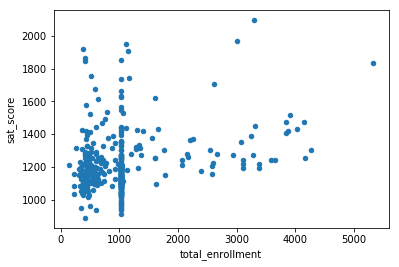

In [66]:
%matplotlib inline

full.plot.scatter(x='total_enrollment', y='sat_score')

In [67]:
full[(full["total_enrollment"] < 1000) & (full["sat_score"] < 1000)]["School Name"]

78                                       NaN
88     KINGSBRIDGE INTERNATIONAL HIGH SCHOOL
90     INTERNATIONAL SCHOOL FOR LIBERAL ARTS
155                MULTICULTURAL HIGH SCHOOL
Name: School Name, dtype: object

## Exploring English language learners and SAT scores

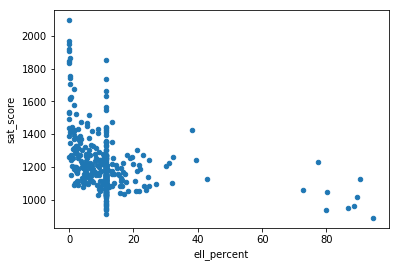

In [68]:
full.plot.scatter(x='ell_percent', y='sat_score')

## Correlating survey scores and SAT scores

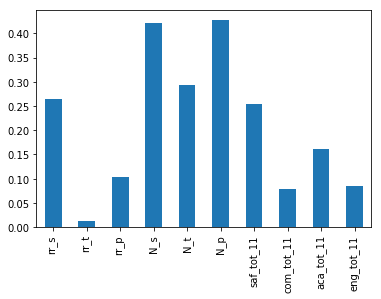

In [69]:
full.corr()["sat_score"][["rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_tot_11", "com_tot_11", "aca_tot_11", "eng_tot_11"]].plot.bar()

## Exploring race and SAT scores

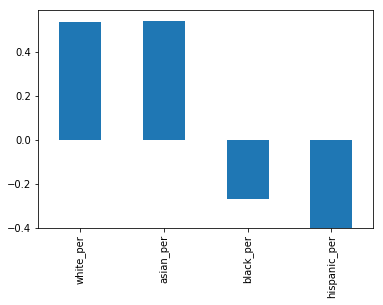

In [70]:
full.corr()["sat_score"][["white_per", "asian_per", "black_per", "hispanic_per"]].plot.bar()

## Gender differences in SAT scores

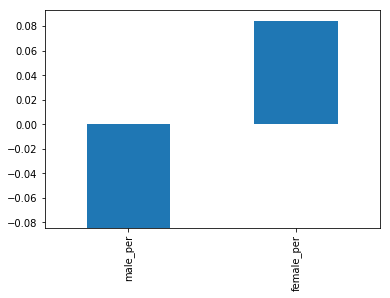

In [71]:
full.corr()['sat_score'][['male_per','female_per']].plot.bar()

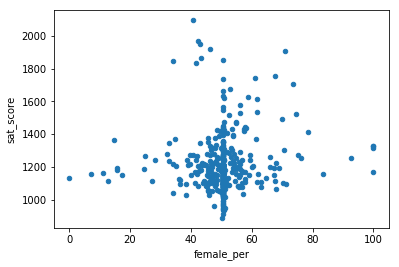

In [72]:
full[full['sat_score'] > 0].plot.scatter(x='female_per',y='sat_score')

In [73]:
full[(full['sat_score'] > 1400) & (full['female_per'] > 65)]['school_name']

10              Professional Performing Arts High School
14                         Eleanor Roosevelt High School
22                          Talent Unlimited High School
35     Fiorello H. LaGuardia High School of Music & A...
185                          Townsend Harris High School
212         Frank Sinatra School of the Arts High School
Name: school_name, dtype: object

## AP scores

In [74]:
full['ap_avg'] = full['AP Test Takers '] / full['total_enrollment']

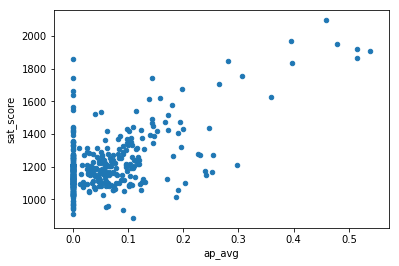

In [75]:
full.plot.scatter(x='ap_avg', y='sat_score')

# Still Working on this
there are mapping options and other datasets to include as well, like attendance

**bold**
- sdf
-dsf 

sd-sd 
